In [ ]:
# Préparation de l'environnement et modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns; sns.set_theme()

In [ ]:
# Importation des datasets


df_1_application_train= pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/application_train.csv')
df_2_application_test= pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/application_test.csv')
df_3_bureau = pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/bureau.csv')
df_4_bureau_balance=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/bureau_balance.csv')
df_5_credit_card_balance=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/credit_card_balance.csv')
#df_6_HomeCredit_columns_description= pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/HomeCredit_columns_description.csv')
df_7_installments_payments=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/installments_payments.csv')
df_8_POS_CASH_balance=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/POS_CASH_balance.csv')
df_9_previous_application=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/previous_application.csv')
df_10_sample_submission=pd.read_csv('Projet+Mise+en+prod+-+home-credit-default-risk/sample_submission.csv')

# I - Découverte du dataset

In [ ]:
pd.set_option('display.max_row', 200)
pd.set_option('display.max_column', 122)

In [ ]:
df_1_application_train

In [ ]:
msno.matrix(df_1_application_train)

In [ ]:
df_2_application_test

In [ ]:
msno.matrix(df_2_application_test)

In [ ]:
df_3_bureau

In [ ]:
msno.matrix(df_3_bureau)

In [ ]:
df_4_bureau_balance

In [ ]:
msno.matrix(df_4_bureau_balance)

In [ ]:
df_5_credit_card_balance

In [ ]:
msno.matrix(df_5_credit_card_balance)

In [ ]:
df_7_installments_payments

In [ ]:
msno.matrix(df_7_installments_payments)

In [ ]:
df_8_POS_CASH_balance

In [ ]:
msno.matrix(df_8_POS_CASH_balance)

In [ ]:
df_9_previous_application

In [ ]:
msno.matrix(df_9_previous_application)

In [ ]:
df_10_sample_submission

In [ ]:
msno.matrix(df_10_sample_submission)

In [ ]:
# Collections for each dataset
datasets = [df_1_application_train,df_2_application_test,df_3_bureau,df_4_bureau_balance,df_5_credit_card_balance,df_7_installments_payments,df_8_POS_CASH_balance,df_9_previous_application,df_10_sample_submission
           ]
names = [

'df_1_application_train',
'df_2_application_test',
'df_3_bureau',
'df_4_bureau_balance',
'df_5_credit_card_balance',
'df_7_installments_payments',
'df_8_POS_CASH_balance',
'df_9_previous_application',
'df_10_sample_submission' ]

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

# SCHEMA

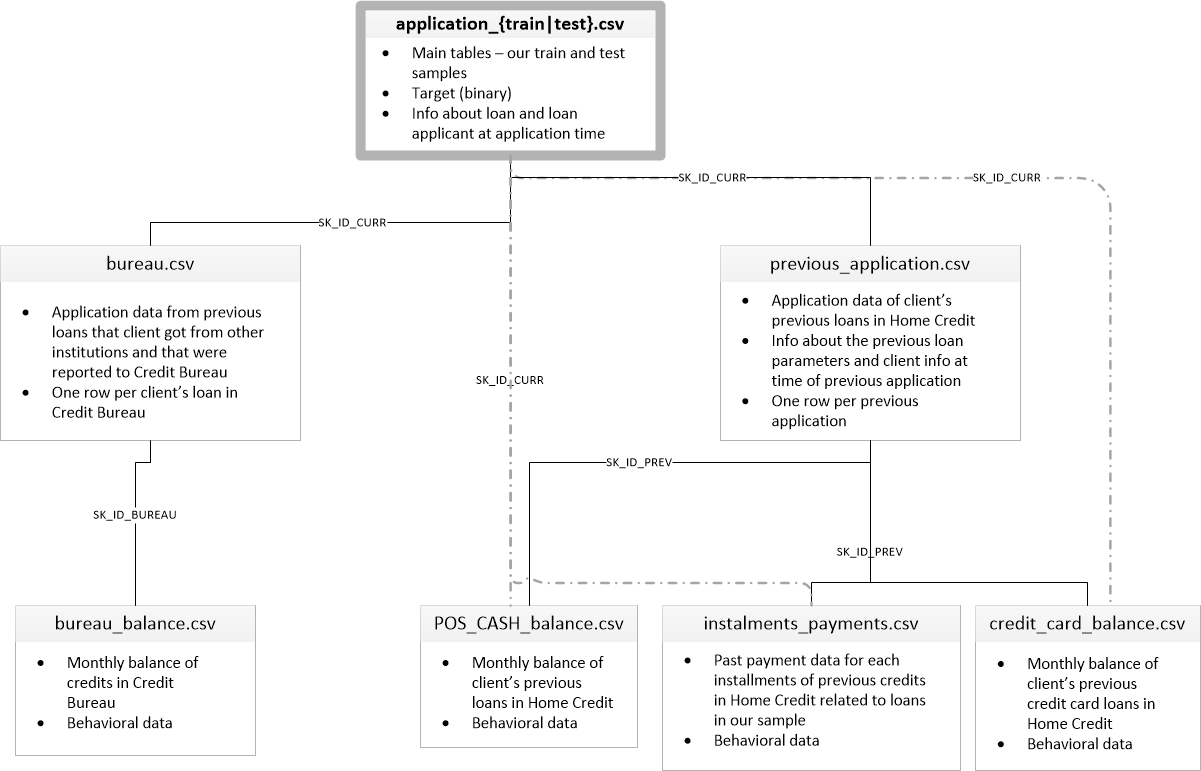

# Analyse exploratoire


In [ ]:
data = df_1_application_train

In [ ]:
data

# Inspect for duplicates

In [ ]:
data.duplicated().sum()

# Inspect for NAN

In [ ]:
data.duplicated().sum()

# Look for any unreal value and transform it (IF needed)
Regarding to the categorical variables, I'll Investigate for any unreal data like -unkown- or -missing- or any value give me the intuiton that this value should be NAN

In [ ]:
for i in data:
    if data[i].dtype == 'O': # Filter only the categorical variables 
        print(f"{i} contain:", data[i].unique())
        print("------------------")

# Findings
I can see in CODE_GENDER and ORGANIZATION_TYPE Columns have 'XNA' Value and due to the reply of one of the compition hosts at this link https://www.kaggle.com/c/home-credit-default-risk/discussion/57248 we will consider the 'XNA' and 'XNP' are NaN values (Check the first reply by 'Martin Kotek')

Also in column NAME_FAMILY_STATUS there's 'Uknown' value which I'll consider also as a NAN

In [ ]:
print(data[['ORGANIZATION_TYPE','NAME_FAMILY_STATUS', 'CODE_GENDER']].isnull().sum())
print('-'*40)
print(data[['ORGANIZATION_TYPE','NAME_FAMILY_STATUS', 'CODE_GENDER']].isnull().sum())

In [ ]:
users_nan = (data.isnull().sum() / data.shape[0]) * 100
users_nan[users_nan > 0].sort_values(ascending=False)

In [ ]:
data.replace({'XNA': np.nan, 'XNP': np.nan, 'Unknown': np.nan}, inplace = True)

In [ ]:
users_nan = (data.isnull().sum() / data.shape[0]) * 100
users_nan[users_nan > 0].sort_values(ascending=False)

# Dropping the columns which contain more than 40% NaNs
Note:
If we have a time we may investigate further to gather more clean data or check with concerned team like (Data Engineers) why we have such all of this NaNs in those columns,
but for now I'll just drop them as we don't have that much time

In [ ]:
data.drop(data.columns[data.isnull().mean()>0.4],axis=1, inplace=True)

In [ ]:
data.shape

In [ ]:
users_nan = (data.isnull().sum() / data.shape[0]) * 100
users_nan[users_nan > 0].sort_values(ascending=False)

# Transformations
For speeding the approach, Columns which contain a very small amount of NaNs valuse will convert it to the most frequent (Mode) in case of categorical variables and Mean in case of numerical variables
I'll do it for all columns which contain NaN values under 14%

In [ ]:
# Columns have less 14% NaN Values and categorical
Cat_columns_lower_percentage_nan  = [i for i in data.columns[(((data.isnull().sum() / data.shape[0]) * 100) > 0) 
                                                                  & (((data.isnull().sum() / data.shape[0]) * 100) < 14)] 
                                     if data[i].dtype == 'O']

# Columns have less 14% NaN Values and numerical
num_columns_lower_percentage_nan  = [i for i in data.columns[(((data.isnull().sum() / data.shape[0]) * 100) > 0) 
                                                                  & (((data.isnull().sum() / data.shape[0]) * 100) < 14)] 
                                     if data[i].dtype != 'O']

In [ ]:
# Note: only on the app_train data because I want to avoide any data leakage so I will first transform the test data (based on information from train data (Mode,Mean))
# Then  transform the train data

for i in Cat_columns_lower_percentage_nan:
    data[i].fillna(data[i].mode()[0], inplace=True)
  

# Inspect Outliers
I will check the numerical varibales we are about to fill the NaN values before the filling (Investigate for any outliers to see weather we will use mode or median or something else)

In [ ]:
data[num_columns_lower_percentage_nan].describe()

In [ ]:
for i in num_columns_lower_percentage_nan:
    plt.figure(figsize=(10,10))
    sns.distplot(data[i])
    plt.xticks(rotation = 70)

# Mean imputation 


I can see some of the features are very skewed to the right (Outliers Exists) and some aren't. So I'll impute using mode for all variables

except EXT_SOURCE_2, AMT_ANNUITY I'll use the mean as I can see from their distrbutions that the mean will be reliable value

In [ ]:
col_mod_transfrom = [i for i in num_columns_lower_percentage_nan if i not in ['EXT_SOURCE_2', 'AMT_ANNUITY','AMT_GOODS_PRICE']]
col_mean_transform = ['EXT_SOURCE_2', 'AMT_ANNUITY']

In [ ]:
for i in col_mod_transfrom:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [ ]:
for i in col_mean_transform:
    data[i].fillna(data[i].mean(), inplace=True)

In [ ]:
data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].median(),inplace = True)


In [ ]:
# extract continuous columns
all_numerical_cols = list(data.select_dtypes(exclude='object').columns)


In [ ]:
all_numerical_cols

In [ ]:
# continuous  columns are all columns excluding target and flags columns
cont_cols = [col for col in all_numerical_cols if col != "TARGET" and col[:5]!='FLAG_']

In [ ]:
# draw histograms for each continuous column    
plt.figure(figsize=(25, 50))
for i, col in enumerate(cont_cols):
    plt.subplot(16, 5, i+1)
    sns.distplot(data[col])
   

In [ ]:
data[cont_cols[1:10]].describe()

In [ ]:
data[cont_cols[10:18]].describe()

In [ ]:
data[cont_cols[18:27]].describe()

In [ ]:
data[cont_cols[27:]].describe()

# Findings
* Days in negatives! it may the data source give all days data with negatives, simplly I'll multiply it by -1
* DAYS_EMPLOYED have maximum value positive and it's 1000 years, also checking this link: https://www.kaggle.com/c/home-credit-default-risk/discussion/57248 the competition hosts mention that this value means infinty which we need to deal with it
* It says in the competition documentation that DAYS_EMPLOYED is 'How many days before the application the person started current employment' and the minimum value for that column is 49 years so still in the same job 50 years!! is kinda suspicious (Except for the very very loyal people which they don't exist :D )
*It seemes to me that maximum income is very suspicous as it's a very huge number comparing to Loan amount (Why someone income is 25 pounds and ask for 1 pound loan!).
*Maximum Age is 69 years old! and maximum employing time is 49 years old! -- i need to check weathr is theres any one have a number of employing days more than the number of birth days (Note: you will see the minimum in days is 69 years but as the values are negatives so we will consider as maximum)

# Deal with unreal value for DAYS_EMPLOYED

In [ ]:
# Check weather is there inconsistent data 
data[(abs(data['DAYS_BIRTH']) < abs(data['DAYS_EMPLOYED'])) & (data['DAYS_EMPLOYED'] != 365243)]

In [ ]:
proper_days_employed_df = data
proper_days_employed_df['YEARS_EMPLOYED'] = proper_days_employed_df['DAYS_EMPLOYED']/-365.25

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(proper_days_employed_df['YEARS_EMPLOYED'])


In [ ]:
# I'll convert all values with 365243 to NaN then I will fill it with ( Average Employment time group by the education )

data['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True) 


In [ ]:
proper_days_employed_df = data
proper_days_employed_df['YEARS_EMPLOYED'] = proper_days_employed_df['DAYS_EMPLOYED']/-365.25

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(proper_days_employed_df['YEARS_EMPLOYED'])


In [ ]:
# See the average years between the Days_birth and Days_employed but also I will depend on the OCCUPATION_TYPE 

data.groupby(['OCCUPATION_TYPE'])['DAYS_EMPLOYED'].mean()

## create Credit/Income and Annuity/Income percentages

In [ ]:
## create Credit/Income and Annuity/Income percentages
data['Credit/Income'] = data['AMT_CREDIT']/data['AMT_INCOME_TOTAL']
data['Annuity/Income'] = data['AMT_ANNUITY']/data['AMT_INCOME_TOTAL']


In [ ]:
data

In [ ]:
## show only clients with difficuties
data[data['TARGET']==1].sort_values(by='Credit/Income', ascending=True)

# Check All categorical columns

In [ ]:
cat_col = data.select_dtypes('object')
cat_col.describe()

In [ ]:
for i in cat_col:
    plt.figure(figsize=(10,10))
    sns.countplot(cat_col[i], orient = 'h', order = cat_col[i].value_counts().index)
    plt.xticks(rotation = 70)

# Action will make for simpler data and filling the NaNs

* NAME_TYPE_SUIT will shorten the categories and merge Other_A, Other_B and Group of people to same Group called Others
* NAME_INCOME_TYPE will shorten the categories and merge Unemployed, student, Maternity leave to same group as logically all of them don't have source of money so will behave similarly regarding the target value
* ORGNIZATION_TYPE I'll take around 10-15 category and merge others to same group called Other
* we have +30% of OCCUPATION_TYPE in train and test data is NaNs, I'll fill it using the mode groupping by the  NAME_EDUCATION_TYPE because it's the most reasonable column who can refer to the occupation type
* we have +17% of EXT_SOURCE_3 in train and test data is NaNs, I'll fill it using the mean groupping by the OCUPPATION_TYPE
* we have +18% of ORGNIZATION_TYPE in train and test data is NaNs, I'll fill it using the mode groupping by the OCUPPATION_TYPE

In [ ]:
data.groupby(['NAME_EDUCATION_TYPE'])['OCCUPATION_TYPE'].agg(pd.Series.mode)

In [ ]:
data['OCCUPATION_TYPE'].isnull().sum()

# Imputing OCCUPATION_TYPE with NAME_EDUCATION_TYPE mode

In [ ]:
data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Secondary / secondary special'] = data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Secondary / secondary special'].fillna('Laborers')
data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Higher education'] =  data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Higher education'].fillna('Core staff')
data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Incomplete higher'] = data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Incomplete higher'].fillna('Laborers')
data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Lower secondary'] = data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Lower secondary'].fillna('Laborers')
data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Academic degree'] = data['OCCUPATION_TYPE'][data['NAME_EDUCATION_TYPE']=='Academic degree'].fillna('Managers')

In [ ]:
data.groupby(['OCCUPATION_TYPE'])['ORGANIZATION_TYPE'].agg(pd.Series.mode)

# The next cell is just imputing the NaNs in ORGANIZATION_TYPE based on the mode of every group in OCCUPATION_TYPE

In [ ]:
data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Accountants') |
                               (data['OCCUPATION_TYPE'] == 'Cleaning staff') |
                               (data['OCCUPATION_TYPE'] == 'Cooking staff') |
                               (data['OCCUPATION_TYPE'] == 'Core staff')|
                               (data['OCCUPATION_TYPE'] == 'Drivers')|
                               (data['OCCUPATION_TYPE'] == 'HR staff')|
                               (data['OCCUPATION_TYPE'] == 'High skill tech staff')|
                               (data['OCCUPATION_TYPE'] == 'IT staff')|
                               (data['OCCUPATION_TYPE'] == 'Laborers')|
                               (data['OCCUPATION_TYPE'] == 'Low-skill Laborers')|
                               (data['OCCUPATION_TYPE'] == 'Managers')] = data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Accountants') |
                                                                                                             (data['OCCUPATION_TYPE'] == 'Cleaning staff') |
                                                                                                             (data['OCCUPATION_TYPE'] == 'Cooking staff') |
                                                                                                             (data['OCCUPATION_TYPE'] == 'Core staff')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'Drivers')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'HR staff')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'High skill tech staff')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'IT staff')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'Laborers')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'Low-skill Laborers')|
                                                                                                             (data['OCCUPATION_TYPE'] == 'Managers')].fillna('Business Entity Type 3')



data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Medicine staff')|
                              (data['OCCUPATION_TYPE'] == 'Secretaries')] = data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Medicine staff')|
                                                                                                                  (data['OCCUPATION_TYPE'] == 'Secretaries')].fillna('Medicine')

data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Private service staff')|
                               (data['OCCUPATION_TYPE'] == 'Realty agents')|
                               (data['OCCUPATION_TYPE'] == 'Sales staff')] = data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Private service staff')|
                                                                                                                 (data['OCCUPATION_TYPE'] == 'Realty agents')|
                                                                                                                 (data['OCCUPATION_TYPE'] == 'Sales staff')].fillna('Self-employed')

data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Security staff')] = data['ORGANIZATION_TYPE'][(data['OCCUPATION_TYPE'] == 'Security staff')].fillna('Security')



In [ ]:
data['OCCUPATION_TYPE'].isnull().sum()

# Convirting Small categories "into Others"

*  I'll take Only the first 15 Categories and I'll convirt the rest to "Others" not "Other" because we already have a group called "Other: and i want to put them in a different group


In [ ]:
data['ORGANIZATION_TYPE'].value_counts(normalize = True)

In [ ]:
others = data['ORGANIZATION_TYPE'].value_counts().index[15:]
label = 'Others'
data['ORGANIZATION_TYPE'] = data['ORGANIZATION_TYPE'].replace(others, label)


In [ ]:
data['ORGANIZATION_TYPE'].unique()

In [ ]:
users_nan = (data.isnull().sum() / data.shape[0]) * 100
users_nan[users_nan > 0].sort_values(ascending=False)

In [ ]:
data.shape

In [ ]:
data

# Imputing DAYS_EMPLOYED and YEARS_EMPLOYED
* We assume most of workers start at 20 Years old = 7305 days

In [ ]:
data[data["DAYS_EMPLOYED"].isna()]["DAYS_BIRTH"]

In [ ]:
data[data["DAYS_EMPLOYED"].isna()]["DAYS_BIRTH"] + 7305

In [ ]:
data.loc[data["DAYS_EMPLOYED"].isna(),["DAYS_EMPLOYED"]] = data[data["DAYS_EMPLOYED"].isna()]["DAYS_BIRTH"] + 7305

In [ ]:
round(data[data["YEARS_EMPLOYED"].isna()]["DAYS_EMPLOYED"] / 365.25)

In [ ]:
data.loc[data["YEARS_EMPLOYED"].isna(),["YEARS_EMPLOYED"]] = round(data[data["YEARS_EMPLOYED"].isna()]["DAYS_EMPLOYED"] / 365.25)

In [ ]:
"""data.drop(['DAYS_EMPLOYED'], axis = 1,inplace=True)
data.drop(['YEARS_EMPLOYED'], axis = 1,inplace=True)"""

In [ ]:
users_nan = (data.isnull().sum() / data.shape[0]) * 100
users_nan[users_nan > 0].sort_values(ascending=False)

# Deleting remaining NaN

In [ ]:

data.drop(['EXT_SOURCE_3'], axis = 1,inplace=True)


In [ ]:
data.shape

In [ ]:
data

# DATA Cleaned ?

In [ ]:
print(data['TARGET'].isnull().sum())

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data['TARGET'])

In [ ]:
# It's very obvious that we have imbalanced data, class(1) is about 8% of the data
data['TARGET'].value_counts(normalize=True).reset_index()

# Data is imbalanced so:
* I'll Consider tha class_weight solution for this problem when we go to the modeling phase (We can use under smapling or over sampling but for me because of the huge difference between both classes, class weight is the best solution)
* Accuracy is not a proper evaluation metric, it will be misleading so we will need to check another metric (e.g. roc_auc).

# Bivariate Analysis

# Which gender applys more for loans?

In [ ]:
# Which gender applys more for loans?
# Is there relation between the gender and the ability to repay?

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
data['CODE_GENDER'].value_counts().plot(kind='bar', title='Males VS Females Apply for Loans');
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='CODE_GENDER', hue='TARGET');
plt.title('Males VS Females with Respect to Target')
plt.xlabel('Gender')
plt.show()

print(data['CODE_GENDER'].value_counts(normalize=True))
print('-'*40)
print(data.groupby(['TARGET'])['CODE_GENDER'].value_counts(normalize=True))
print('-'*40)
print(data.groupby(['CODE_GENDER'])['TARGET'].value_counts(normalize=True))

* Females applys for loans more than Males
* Gender not affect in our Target because the difference between the gender are only 3% ( we can't relay on it)

# Which type of loan contract clients applys more for?

In [ ]:
# Which type of loan contract clients applys more for?

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
data['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar', title='Cash VS Revolving Loans');
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.title('Cash VS Revolving Loans with Respect to Target')
plt.xlabel('.')
plt.show()

print(data['NAME_CONTRACT_TYPE'].value_counts(normalize=True))
print('-'*40)
print(data.groupby(['TARGET'])['NAME_CONTRACT_TYPE'].value_counts(normalize=True))

* Most of the clients take cash loans
* It seems to me that this feature has no effect on the target

# Is there relation between the age and the ability to repay?

In [ ]:

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(data['DAYS_BIRTH']/-365.25).plot(kind='hist', bins=50, title='Distribution of Clients\' Age');
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
proper_day_birth_df = data[['DAYS_BIRTH', 'TARGET']]
proper_day_birth_df['DAYS_BIRTH'] = proper_day_birth_df['DAYS_BIRTH']/-365.25
sns.distplot(proper_day_birth_df[proper_day_birth_df['TARGET']==0]['DAYS_BIRTH'], hist=False, label='Can Repay');
sns.distplot(proper_day_birth_df[proper_day_birth_df['TARGET']==1]['DAYS_BIRTH'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Clients\' Age with Respect to Target')
plt.xlabel('Age')
plt.legend();
plt.show()

* Clients aged about 30 years are more likely to have difficulties with repay, where those aged about 40 and more can repay well.
* This feature will be important for the model.

# Does the client's No. of children affect the ability to repay?

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
data['CNT_CHILDREN'].plot(kind='hist', bins=19, title='Distribution of Clients\' No. of Children');
plt.xlabel('No. of Children')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.distplot(data[data['TARGET']==0]['CNT_CHILDREN'], hist=False, label='Can Repay');
sns.distplot(data[data['TARGET']==1]['CNT_CHILDREN'], hist=False, label='Can\'t Repay');
plt.title('Clients\' No. of Children with Respect to Target')
plt.xlabel('No. of Children')
plt.legend()
plt.show()

* Client's without any children applys for loans more than others, and with increasing No. of children, client's don't tend to loan

# Is there a relation between client income ant the amount of loan apply for?



# Does income and credit affect in the ability to repay?

In [ ]:
data

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
proper_income_df = data.copy()
proper_income_df['AMT_INCOME_TOTAL'] = proper_income_df['AMT_INCOME_TOTAL']/10000
proper_income_df['AMT_INCOME_TOTAL'].plot(kind='hist', bins=1000, title='Distribution of Clients\' Income');
plt.xlabel('Total Income')
plt.xlim([0,100])

plt.subplot(1, 2, 2)
sns.distplot(proper_income_df[proper_income_df['TARGET']==0]['AMT_INCOME_TOTAL'], hist=False, bins=1000, label='Can Repay');
sns.distplot(proper_income_df[proper_income_df['TARGET']==1]['AMT_INCOME_TOTAL'], hist=False, bins=1000, label='Can\'t Repay');
plt.title('Distribution of Clients\' Income with Respect to Target')
plt.xlabel('Total Income')
plt.xlim([0,100])
plt.legend();
plt.show()

In [ ]:
proper_income_df['log_AMT_INCOME_TOTAL'] = np.log10(proper_income_df['AMT_INCOME_TOTAL']*10000)
proper_income_df['log_AMT_CREDIT'] = np.log10(proper_income_df['AMT_CREDIT'])

plt.figure(figsize=(8,8))
sns.lmplot(x='log_AMT_INCOME_TOTAL', y='log_AMT_CREDIT', data=proper_income_df, hue='TARGET');
plt.title('Relation Between Total Income & Loan Credit')
plt.xlabel('Total Income')
plt.ylabel('Loan Credit')
plt.show()

sns.distplot(proper_income_df[proper_income_df['TARGET']==0]['log_AMT_CREDIT'], hist=False, label='Can Repay');
sns.distplot(proper_income_df[proper_income_df['TARGET']==1]['log_AMT_CREDIT'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Loan Credit with Respect to Target');
plt.xlabel('Loan Credit')
plt.legend();

* Client's with low income tends to apply for loans more than others with high income.
* The more client's income is, the larger loan amount apply for.
* Client't with income more than 3M tends always to repay, so this feature may help in our target (Frist Graph on the right)
* Clients with income between 10 and 18 are less likely to repay, vice versa. (Frist Graph on the right)
* I can see that Loan Credit isn't affect the Target Distirbution

# what's most income type of clients?

In [ ]:
ax = sns.countplot(data=data, x='NAME_INCOME_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title('Clients\' Income Type Value Counts with Respect to Target')
plt.xlabel('Income Type')
plt.show()

print('\n'*2)
data.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts()

* Working clients are more willing to apply for loans more than others.
* Altought a few businessmen and students apply for loans, but they always repay.

# what's most high education degree for clients?

In [ ]:
ax = sns.countplot(data=data, x='NAME_EDUCATION_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title('Clients\' High Education Level Value Counts with Respect to Target')
plt.xlabel('High Education Level')
plt.show()

print('\n'*2)
data.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts()

* Clients with Secondary high education level are more willing to apply for loans more than others.
* Almost 98% of clients with Academic degree high education level can repay their loans.

# IS there relation between employment year and the ability to repay

In [ ]:
proper_days_employed_df = data.copy()
proper_days_employed_df['YEARS_EMPLOYED'] = proper_days_employed_df['DAYS_EMPLOYED']/-365.25

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(proper_days_employed_df['YEARS_EMPLOYED'])
plt.title('Distribution of Clients\' Employment Years')
plt.xlabel('Employment Years')

plt.subplot(1, 2, 2)
sns.distplot(proper_days_employed_df[proper_days_employed_df['TARGET']==0]['YEARS_EMPLOYED'], hist=False, label='Can Repay');
sns.distplot(proper_days_employed_df[proper_days_employed_df['TARGET']==1]['YEARS_EMPLOYED'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Clients\' Employment Years with Respect to Target');
plt.xlim([-5,20])
plt.xlabel('Employment Years')
plt.legend();

In [ ]:
proper_days_employed_df['YEARS_EMPLOYED'] 

# categorical variables among the target to see weather any pattern¶

In [ ]:
for i in cat_col:
    plt.figure(figsize=(10,10))
    sns.countplot(data = data, x = 'TARGET', hue= i)
    plt.xlabel('TARGET')
    plt.ylabel('Count')
    plt.title(f'{i}-TARGET Distribution')
    plt.show()

I see most of the data aren't give much informaion about the categories, so i may go for statistical approach to test the dependancy for each variable and the TARGET

In [ ]:
def dependency(data, feature):
    
    table = pd.crosstab(data['TARGET'], data[feature])
    stat, p, dof, expected = chi2_contingency(table) 
    
    print(feature)
    print("Degree of freedom: ", dof)
    significance_level = 0.05
    print("p value: " + str(p)) 

    if p <= significance_level: 
        print( 'REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT') 
    else: 
        print('{}: ACCEPT NULL HYPOTHESIS, THE VARIABLES ARE INDEPENDENT')
    print()

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
for i in cat_col.columns:
    dependency(data,i)

# CORRELATION

In [ ]:
cont_cols.remove('EXT_SOURCE_3')

In [ ]:
cont_cols_with_target = cont_cols + ['TARGET']

In [ ]:
ext_data = data[cont_cols_with_target]
ext_data_corrs = ext_data.corr()

In [ ]:
plt.figure(figsize = (25, 25))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

# Findings
* CNT_CHILDREN AND CNT_FAM_MEMBERS have 0.88 correlation
* AMT_CREDIT AND AMT_GOOD_PRICE have 0.99 correlation
* AMT_CREDIT AND AMT_ANNUITY have 0.77 correlation
* REGION_RATING_CLINET AND REGION_RATING_CLIENT_W_CITY have 0.95 correlation
* REG_REGION_NOT_WORK_REGION AND LIVE_REGION_NOT_WORK_REGION have 0.86 correlation
* REG_CITY_NOT_WORK_CITY AND LIVE_CITY_NOT_WORK_CITY have 0.83 correlation
* OBS_30_CNT_SOCIAL_CIRCLE AND OBS_60_CNT_SOCIAL_CIRCLE have 1 correlation
* DEF_30_CNT_SOCIAL_CIRCLE AND DEF_60_CNT_SOCIAL_CIRCLE have 0.86 correlation
* I will drop one of every pairs (the one who is less correlated with the TARGET)¶

In [ ]:
ext_data_corrs['TARGET'].abs().sort_values(ascending=False)

In [ ]:
data = data.drop(columns=[
    'CNT_FAM_MEMBERS',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'OBS_60_CNT_SOCIAL_CIRCLE',

    'YEARS_EMPLOYED'
])

In [ ]:
cols_to_remove = ['AMT_CREDIT', 'CNT_FAM_MEMBERS', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'OBS_60_CNT_SOCIAL_CIRCLE','SK_ID_CURR']
cont_cols = list(set(cont_cols) - set(cols_to_remove))
cont_cols 

# Outliers imputations

In [ ]:
def impute_outliers_IQR(df):

    q1=df.quantile(0.25)
    q3=df.quantile(0.75)

    IQR=q3-q1

    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()

    df = np.where(df > upper, df.quantile(0.8), np.where(df < lower, df.quantile(0.2),df))

    return df

In [ ]:
for i in cont_cols:
    data[i] = impute_outliers_IQR(data[i])

In [ ]:
sns.distplot(data['AMT_ANNUITY'])

In [ ]:
data.info()

# Feature Engineering

There are two indicators which are critical in mortgage approval process.

* LTV, loan to value, ratio = Loan / Value of collateral. Which is 'AMT_CREDIT'/ 'AMT_GOODS_PRICE'.
* DTI, Debt to income, ratio = amount of all the monthly debt payments / the gross monthly income. Which is 'AMT_ANNUITY' / 'AMT_INCOME_TOTAL'

In [ ]:
data['LTV'] = data['AMT_CREDIT']/data['AMT_GOODS_PRICE']
data['DTI'] = data['AMT_ANNUITY']/data['AMT_INCOME_TOTAL']

# Data are prepared for modeling
* The data isn't have NaNs and I can say that RandomFroest model will be a good fit for this data as it 90% of it is boolean or categorical, so no need for any parametric models like Logistic Regression
* Also the data isn't have lineary correlated with the target variable.
* I didn't make any transformation to numeric variables as I'll use RandomForest (Which is will not got affected by the distribution of the variables)
    


In [ ]:
data

In [ ]:
to_keep=[
    'SK_ID_CURR',
    'TARGET',
    'OCCUPATION_TYPE',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'Credit/Income',
    'Annuity/Income',
    'LTV',
    'DTI']

In [ ]:
data = data[to_keep]

In [ ]:
data

# Export du dataframe

In [ ]:
# Export du dataframe

data.to_csv("./data.csv", index=False)

